<a href="https://colab.research.google.com/github/NeevSabhani/Data-Science/blob/main/Unit7/NeevSabhUnit7Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
!pip install preliz
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-e1t0x_pc
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-e1t0x_pc
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev22+g0184702f-py3-none-any.whl size=1262235 sha256=7defbf7b9aa95cf809b04798131cc84f207e682e8c6a2263b6cb73d8162dec6a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ezn5y929/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.5 MB/s eta 0:00:00
   ━

#**Unit 7 Project: Loan Amounts**

For this project, I choose to make models that would predict Loan Amounts. I choose this idea not because of its importance (though there are some), but because I thought that doing this would be fun and I would find interesting relationships between Loan Amounts and different factors such as Credit Score.

##**Data and Casual Diagram**

###**Data**

For my data, I will be using a dataset about loans that I found on Kaggle (tried not to use kaggle, but I found this dataset interesting and I couldn't find a better one somehwere else)

In [52]:
loancsv = '/content/loan_data.csv'
loan = pd.read_csv(loancsv)
loan = loan.head(1000)
loan = loan.iloc[::20].reset_index(drop=True)
loan

#My dataset has over 45000 data points which is WAYYYY to much, so here im reducing it to a random sample size so my models can run quicker

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,25.0,male,Bachelor,195718.0,0,RENT,35000.0,VENTURE,7.49,0.18,4.0,684,Yes,0
2,26.0,male,Bachelor,75503.0,5,RENT,30000.0,MEDICAL,17.99,0.40,2.0,616,No,1
3,21.0,female,Bachelor,158338.0,0,RENT,30000.0,VENTURE,5.99,0.19,4.0,623,Yes,0
4,24.0,male,Bachelor,300951.0,2,RENT,18000.0,EDUCATION,12.98,0.06,3.0,671,No,0
5,26.0,male,Bachelor,281792.0,1,MORTGAGE,21600.0,HOMEIMPROVEMENT,12.18,0.08,3.0,584,Yes,0
6,22.0,female,Bachelor,16890.0,0,OWN,4750.0,EDUCATION,11.01,0.28,3.0,645,No,1
7,23.0,male,Bachelor,258980.0,0,MORTGAGE,35000.0,MEDICAL,14.79,0.14,3.0,618,Yes,0
8,23.0,male,High School,17859.0,0,OWN,7750.0,PERSONAL,17.04,0.43,4.0,626,No,1
9,24.0,male,Associate,80145.0,1,RENT,25000.0,EDUCATION,9.91,0.31,2.0,636,No,1


###**Casual Diagram**

####**The code**

In [53]:
import graphviz

dot = graphviz.Digraph(format='png')

dot.node("Age", "Person Age")
dot.node("Education", "Education Level")
dot.node("Income", "Applicant Income")
dot.node("LoanIntent", "Loan Intent")
dot.node("LoanAmt", "Loan Amount")
dot.node("LoanIntRate", "Loan Interest Rate")
dot.node("LoanPctIncome", "Loan % of Income")
dot.node("CreditScore", "Credit Score")


dot.node("InterestRates", "Interest Rates")
dot.node("Inflation", "Inflation Rate")
dot.node("EconomicConditions", "Economic Conditions")
dot.node("BankPolicies", "Bank Lending Policies")
dot.node("MarketTrends", "Housing & Market Trends")


dot.edge("Age", "LoanAmt")
dot.edge("Education", "LoanAmt")
dot.edge("Income", "LoanAmt")
dot.edge("LoanIntent", "LoanAmt")
dot.edge("LoanIntRate", "LoanAmt")
dot.edge("LoanPctIncome", "LoanAmt")
dot.edge("CreditScore", "LoanAmt")


dot.edge("InterestRates", "LoanIntRate")
dot.edge("Inflation", "LoanIntRate")
dot.edge("EconomicConditions", "Income")
dot.edge("BankPolicies", "LoanIntRate")
dot.edge("MarketTrends", "LoanAmt")

dot.edge("Age", "CreditScore")
dot.edge("Age", "Income")
dot.edge("Education", "Income")
dot.edge("Income", "CreditScore")
dot.edge("CreditScore", "LoanIntRate")
dot.edge("LoanIntRate", "LoanPctIncome")



####**The resulting Casual**

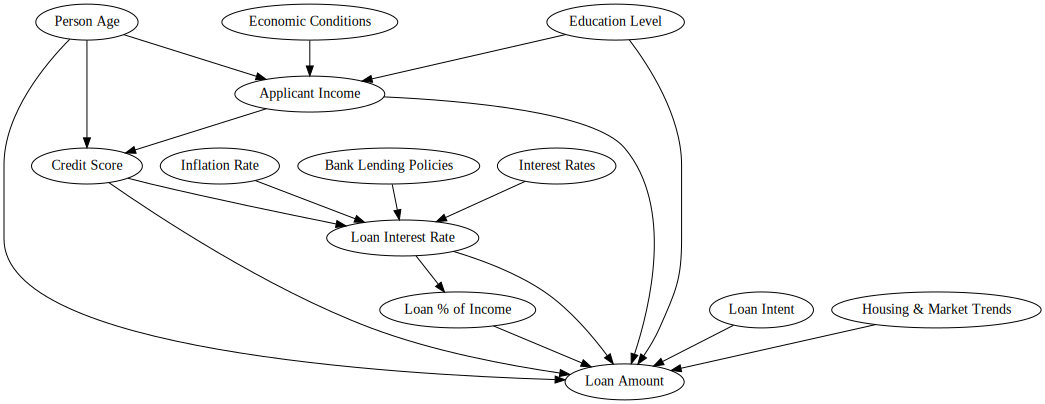

In [54]:
dot

For my Models, I will focus in on how a persons Income, Age, and Credit score affects the loan amounts that they get. As you can see in my Casual Diagram, there are many factors, but why did I choose Income, Age, and Credit Score? Well, I believe that those 3 factors, compared to the rest, affect the Loan Amount that they get the most. While factors like Loan % of Income and Interest Rates do affect the Loan Amount, I think that the 3 factors im using affects Loan Amounts more and I would rather focus on those 3 than the other variables. As for the other factors, I either thought that they were not as important or I just did not have any data on them.

(Also, according to my casual diagram, there is interaction between those 3 factors which I wanted to find out more about)

##**My models**

For my models, I will be making 6 models:
1. Polynomial model with person income
2. Bspline with person income
3. Bspline with person income and credit score
4. Bspline with person income and person age
5. Bspline with credit score and person age
6. Bspline with all three

I chose B-splines and polynomial models over Gaussian Processes (GPs) because they are computationally more efficient, especially for large datasets like loan prediction, where GPs scale poorly (O(n³) complexity) (Wrote before I reduced my Sample size. So the time complexity would not be that much of a problem, but creating a GP is much more complicated thatn using polynomial or Bspline). B-splines capture local nonlinearity with controlled flexibility, while polynomials model (as long as you don't overfit) smooth global trends, making them well-suited for structured financial data with fixed predictors like income and credit score. GPs, while powerful, require heavy  tuning, making them less practical for this specific task .


###**Knots**

Looking at my data set, I created knots for credit score, income, and age that I will use throughout my models

In [55]:
cs = [500, 650, 700]
inc = [50000, 100000, 200000]
age=[22, 25]

###**Model 1**

In [32]:
model_poly = bmb.Model("loan_amnt ~ poly(person_income, degree=4)", loan, family="negativebinomial")
idata_poly = model_poly.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


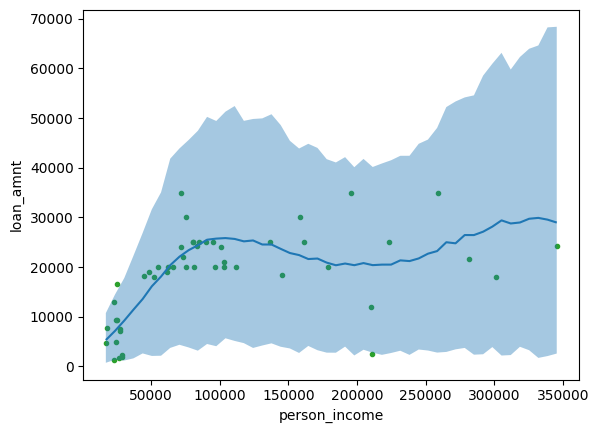

In [33]:
bmb.interpret.plot_predictions(model_poly, idata_poly, "person_income", pps=True)
plt.plot(loan.person_income, loan.loan_amnt, "C2.", zorder=-3)

###**Model 2**

In [44]:
bspline_1 = bmb.Model(
    "loan_amnt ~ bs(person_income, knots=two)",
    loan,
    family="negativebinomial"
)
idata_1 = bspline_1.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


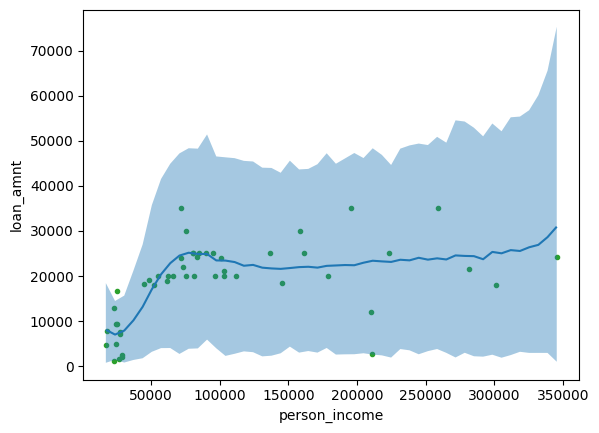

In [46]:
bmb.interpret.plot_predictions(bspline_1, idata_1, "person_income", pps=True)
plt.plot(loan.person_income, loan.loan_amnt, "C2.", zorder=-3)

###**Model 3**

In [70]:
bspline_2 = bmb.Model(
    "loan_amnt ~ bs(person_income, knots=two) + bs(credit_score, knots=one)",
    loan,
    family="negativebinomial")
idata_2 = bspline_2.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


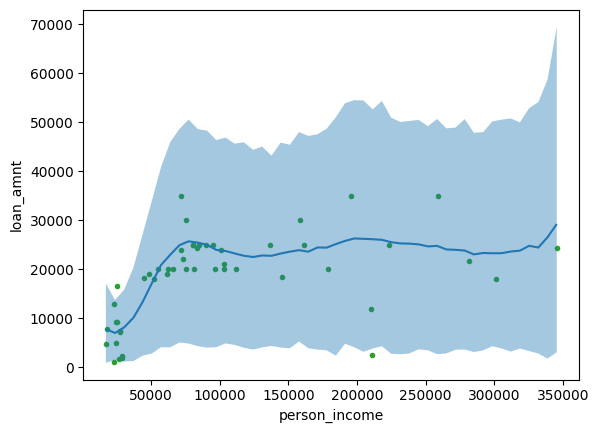

In [71]:
bmb.interpret.plot_predictions(bspline_2, idata_2, "person_income", pps=True)
plt.plot(loan.person_income, loan.loan_amnt, "C2.", zorder=-3)

###**Model 4**

In [60]:
bspline_4 = bmb.Model(
    "loan_amnt ~ bs(person_income, knots=two) + bs(person_age, knots=age)",
    loan,
    family="negativebinomial")
idata_4 = bspline_4.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


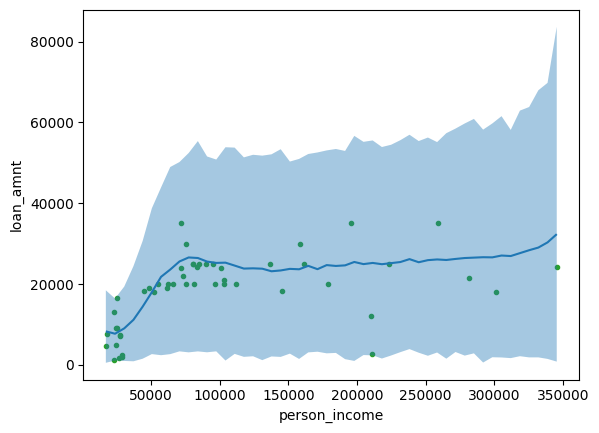

In [62]:
bmb.interpret.plot_predictions(bspline_4, idata_4, "person_income", pps=True)
plt.plot(loan.person_income, loan.loan_amnt, "C2.", zorder=-3)

###**Model 5**

In [68]:
bspline_5 = bmb.Model(
    "loan_amnt ~ bs(credit_score, knots=one) + bs(person_age, knots=age)",
    loan,
    family="negativebinomial")
idata_5 = bspline_5.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


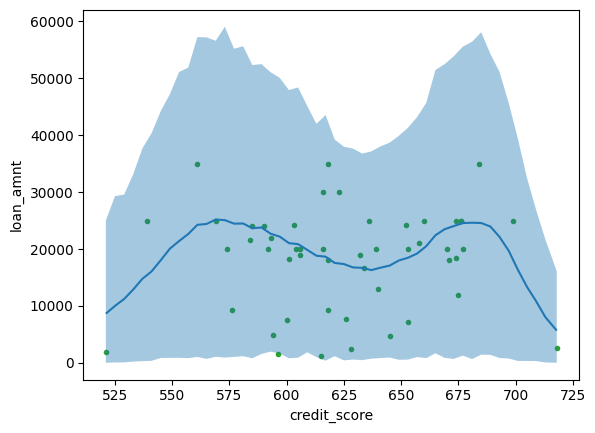

In [69]:
bmb.interpret.plot_predictions(bspline_5, idata_5, "credit_score", pps=True)
plt.plot(loan.credit_score, loan.loan_amnt, "C2.", zorder=-3)

###**Model 6**

In [66]:
bspline_3 = bmb.Model(
    "loan_amnt ~ bs(person_income, knots=two) + bs(credit_score, knots=one) + bs(person_age, knots=age)",
    loan,
    family="negativebinomial"
)
idata_3 = bspline_3.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


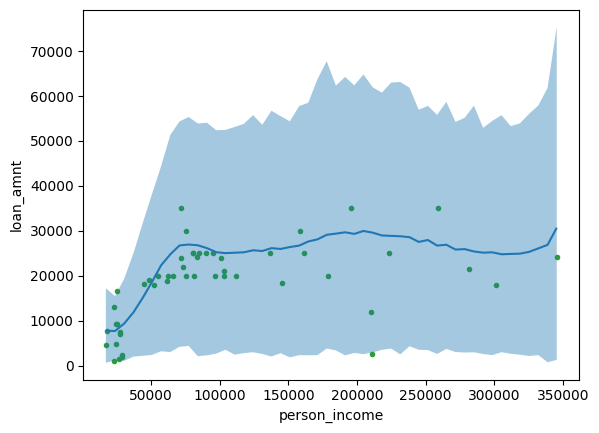

In [67]:
bmb.interpret.plot_predictions(bspline_3, idata_3, "person_income", pps=True)
plt.plot(loan.person_income, loan.loan_amnt, "C2.", zorder=-3)

##**Conclusion**

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

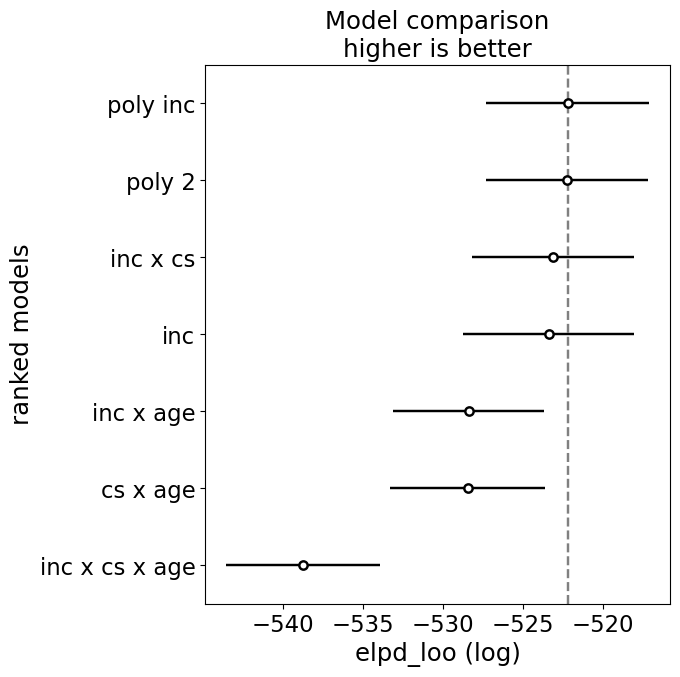

In [83]:
bd = az.compare({"inc":idata_1, "inc x cs":idata_2, "inc x age":idata_3,"cs x age":idata_4, "inc x cs x age":idata_5,  "poly inc":idata_poly})
az.plot_compare(bd)

Looking at the ELPD LOO scores, the polynomial model using only person income is the best. This makes sense because income is a huge factor in loan decisions, and the polynomial function is flexible enough to capture its relationship with loan amounts without overcomplicating things.

The B-spline model with income and credit score also does well, showing that credit score adds some useful information, but it’s not as strong as just modeling income with a polynomial. Income alone as a Bspline also does well, but it does not outperform the income polynomial (Maybe because the knots I choose were not as good as I thought they were).The models that bring in age, either alone or with other variables, don’t perform as well, meaning age probably isn’t a great predictor in this dataset. The worst model is the B-spline with all three predictors, which likely means that adding too many variables introduced noise rather than improving predictions—basically, it overcomplicated things without adding value.

This mostly fits expectations, since income is clearly the most important factor, but it’s surprising that B-splines with multiple predictors didn’t outperform a simple polynomial model.